In [1]:
from decision_tree import DecisionTree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# reading data
spam = pd.read_csv('../data/spam.csv', dtype=float)
cancer = pd.read_csv('../data/cancer.csv')
cancer.label = cancer.label.apply(lambda x: 1 if x == 'M' else 0)

In [3]:
# data with depth and accuracy estimation
result = {}

# a dict for best clfs
best_clf = {}

# a dict with data
sets = {'spam': spam, 'cancer': cancer}

# for each dataset
for name in sets:
    data = sets[name]
    
    # splitting the data into 80/20 train val
    X_train, X_test, y_train, y_test = train_test_split(spam.drop(['label'], axis=1), spam.label, test_size=0.2, 
                                                        random_state=42, shuffle=True)
    result[name] = {}
    
    # for each split criterion
    for criterion in ['gini', 'misclassification', 'entropy']:
        result[name][criterion] = {}
        max_acc = -1
        
        # for depth from 1 to 10
        for depth in range(1, 11):
            
            # initializing the tree with the rigth criterion
            dt = DecisionTree(criterion_name=criterion)
            
            # training with max depth
            dt.train(X_train.values, y_train.values.astype(int), max_depth=depth)
            
            # acquiring accuracy 
            accuracy = sum(dt.predict(X_test.values) == y_test.values.astype(int)) / len(y_test)

            # keeping only the best
            if accuracy > max_acc:
                result[name][criterion] = f'depth {depth}, accuracy {accuracy:.3f}'
                max_acc = accuracy
                best_clf[f'{name} {criterion}'] = dt

In [4]:
# resulting depths with accuracy
pd.DataFrame.from_dict(result, orient='index')

,gini,misclassification,entropy
spam,"depth 10, accuracy 0.924","depth 7, accuracy 0.914","depth 9, accuracy 0.923"
cancer,"depth 10, accuracy 0.927","depth 9, accuracy 0.914","depth 10, accuracy 0.924"


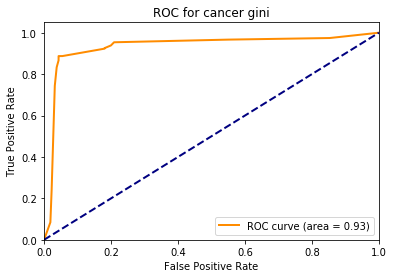

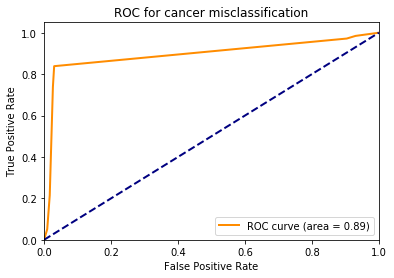

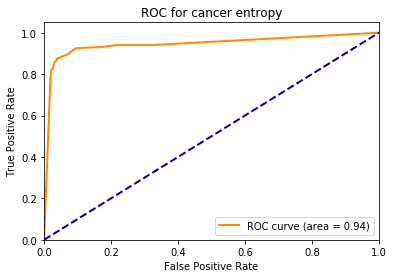

In [5]:
# ROC with AUC for three models for cancer dataset
for model in best_clf:
    if model.startswith(name):
        fpr, tpr, _ = roc_curve(y_test.values.astype(int), best_clf[model].predict_proba(X_test.values)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC for {model}')
        plt.legend(loc="lower right")
        plt.show()